In [3]:
## Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf 
import xgboost as xgb 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

2023-08-10 01:49:24.710796: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 01:49:27.631402: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 01:49:27.633432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 01:49:32.705280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Importing Data

In [4]:
biomass = pd.read_csv("dataset/Biomass_History.csv")
distance = pd.read_csv("dataset/Distance_Matrix.csv")


# 1.- Data Exploration

## 1.1 Biomass

In [5]:
biomass.drop(columns='Index', inplace=True)

In [6]:
biomass.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


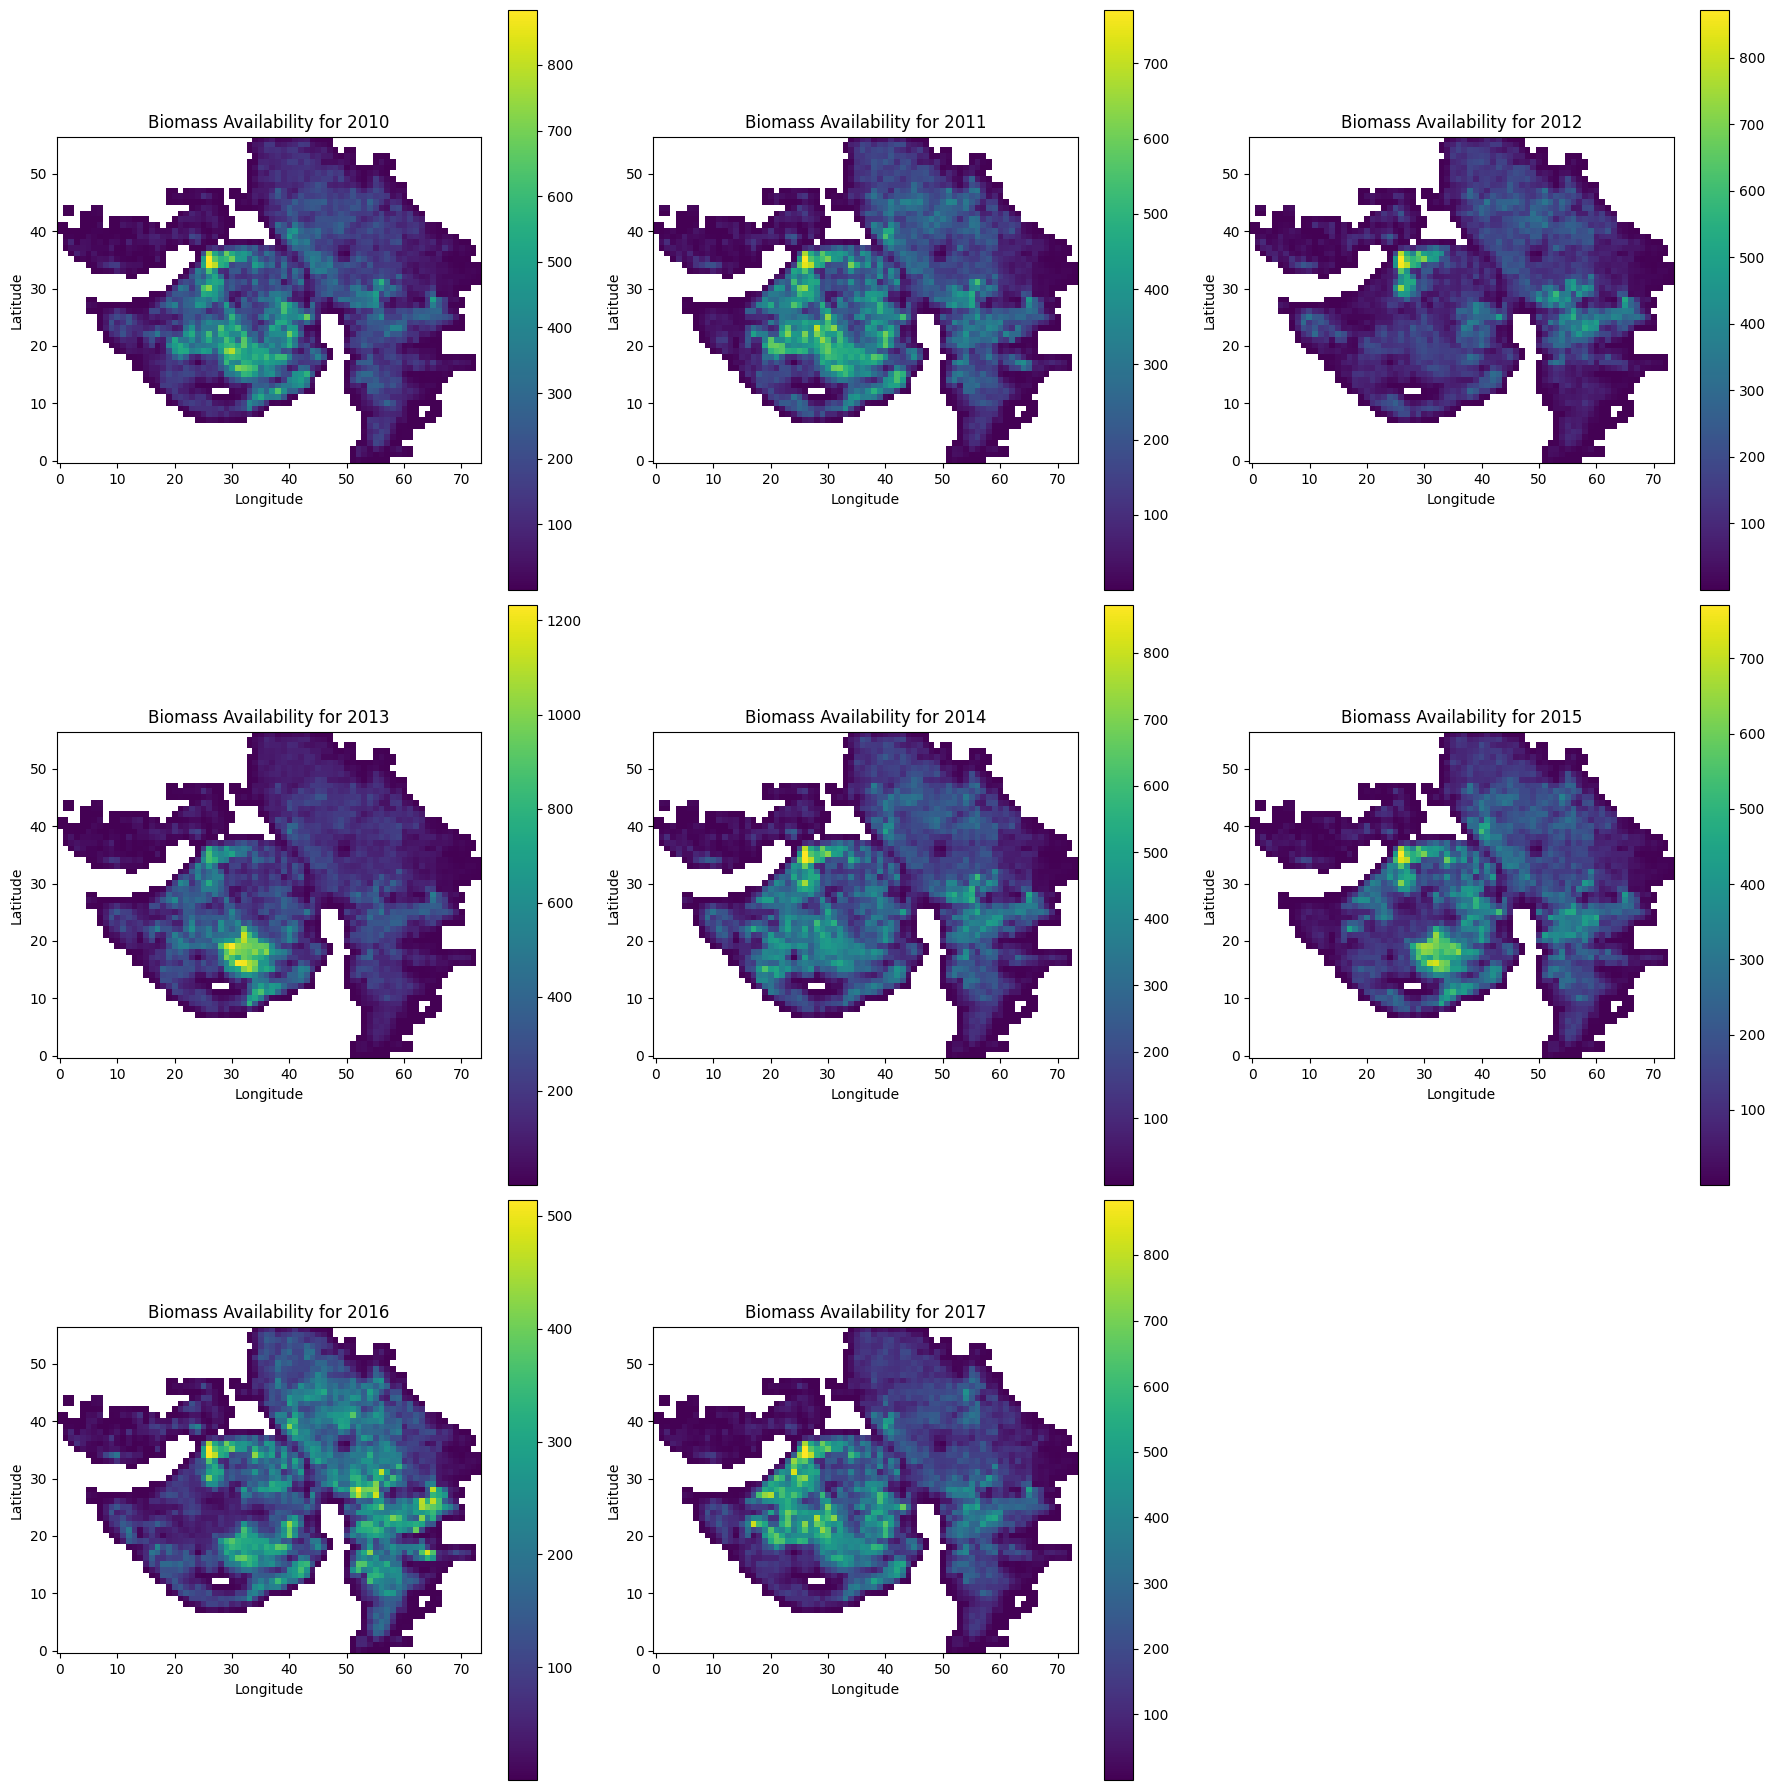

In [7]:
# Define colors for each year
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()


# Plot each year's data in a separate subplot
years = biomass.columns[2:]
for i, year in enumerate(years):
    heatmap_data = biomass.pivot_table(values=year, index='Latitude', columns='Longitude')
    im = axs[i].imshow(heatmap_data, cmap='viridis', interpolation='nearest', origin='lower')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_title("Biomass Availability for "+ year)
    axs[i].grid(False)
    fig.colorbar(im, ax=axs[i])

# Hide any remaining empty subplots (if the number of years is less than 9)
for i in range(len(years), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

### 1.2 Distance Matrix 

In [8]:
distance.drop(columns="Unnamed: 0",inplace=True)

In [9]:
distance


,0,1,2,3,4,5,6,7,8,9,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2414,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2415,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2416,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


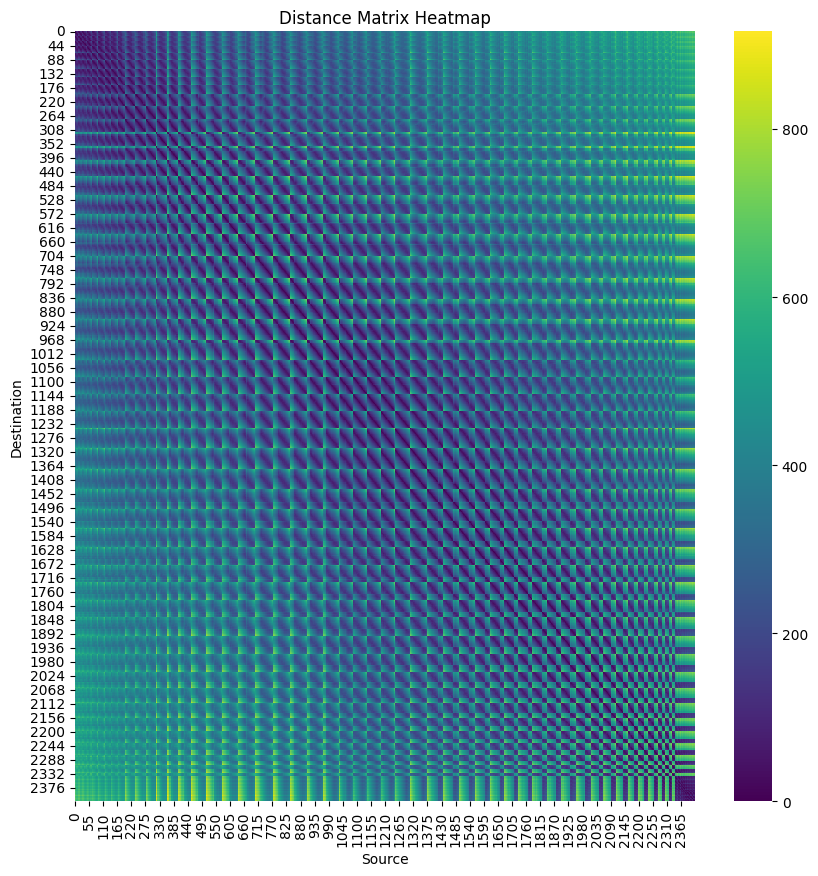

In [10]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap using seaborn
sns.heatmap(distance, cmap='viridis', ax=ax)

# Set axis labels and title
ax.set_xlabel('Source')
ax.set_ylabel('Destination')
ax.set_title('Distance Matrix Heatmap')

# Show the plot
plt.show()

### Biomass Prediction 2018-2019

In [13]:
## Splitting Data

train = biomass[['2010','2011','2012','2013','2014']]
val = biomass[['2015','2016']]
test = biomass[['2017']]

In [14]:
# Normalizing the data

train_mean = train.mean()
train_std = train.std()

train_df = (train - train_mean) / train_std
val_df = (val - train_mean) / train_std
test_df = (test - train_mean) / train_std

##### Base Model - ARIMA

/workspaces/ShellHackaton/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


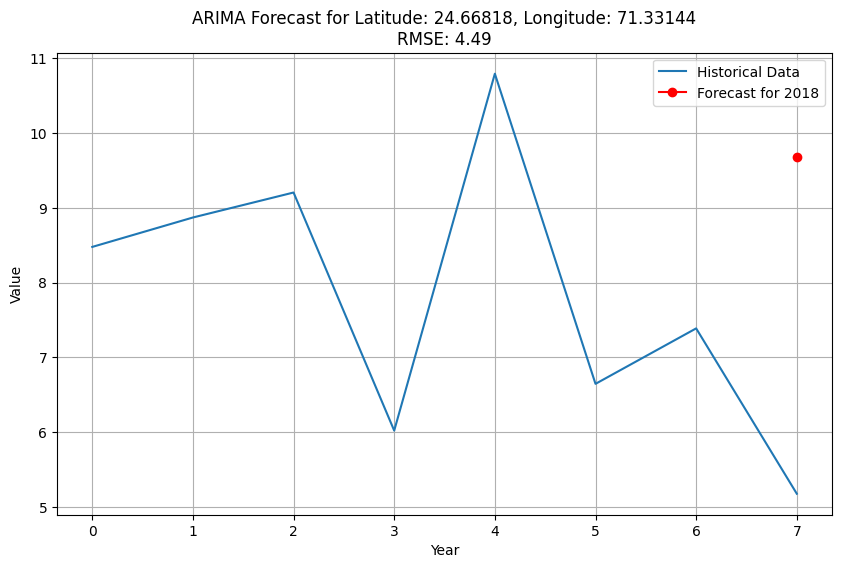

Forecasted value for 2018: 9.68
RMSE for the forecast: 4.49


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

latitude = biomass['Latitude'][0]
longitude = biomass['Longitude'][0]

# Extract the relevant year columns
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
time_series_data = biomass.loc[(biomass['Latitude'] == latitude) & (biomass['Longitude'] == longitude), years]

# Convert the data to a time series
time_series = np.array(time_series_data).flatten()

# Split data into train (up to 2017) and test (2018)
train_size = len(time_series) - 1
train, test = time_series[:train_size], time_series[train_size:]

# Fit an ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example order, you can tune this
model_fit = model.fit()

# Forecast the next year (2018)
forecast = model_fit.forecast(steps=1)[0]

# Calculate RMSE on test data (2018 actual values)
rmse = np.sqrt(mean_squared_error(test, [forecast]))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(time_series)), time_series, label='Historical Data')
plt.plot(len(time_series) - 1, forecast, marker='o', color='red', label='Forecast for 2018')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'ARIMA Forecast for Latitude: {latitude}, Longitude: {longitude}\nRMSE: {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(f'Forecasted value for 2018: {forecast:.2f}')
print(f'RMSE for the forecast: {rmse:.2f}')


## OBVIOUSLY HORRIBLE RESULTS



#### Prophet Solution

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

time_series_data = biomass.loc[(biomass['Latitude'] == latitude) & (biomass['Longitude'] == longitude), years]

# Convert the data to a time series
time_series = np.array(time_series_data).flatten()

# Normalize the data
scaler = MinMaxScaler()
time_series_normalized = scaler.fit_transform(time_series.reshape(-1, 1))

# Create a sequence of input and output data for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target_val = data[i+seq_length]
        sequences.append(seq)
        target.append(target_val)
    return np.array(sequences), np.array(target)

seq_length = 3  # You can adjust this sequence length
X, y = create_sequences(time_series_normalized, seq_length)

# Split data into train (up to 2017) and test (2018)
train_size = len(X) - 1
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]



#### Creating and Training LSTM Model

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 12ms/step - loss: 0.3212
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2838
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2680
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2266
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2178
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2048
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1736
Epoch 13/100
4/4 [==============================] - 0s 2ms/s

## Prediction and Evaluation 

1/1 [==============================] - 0s 163ms/step


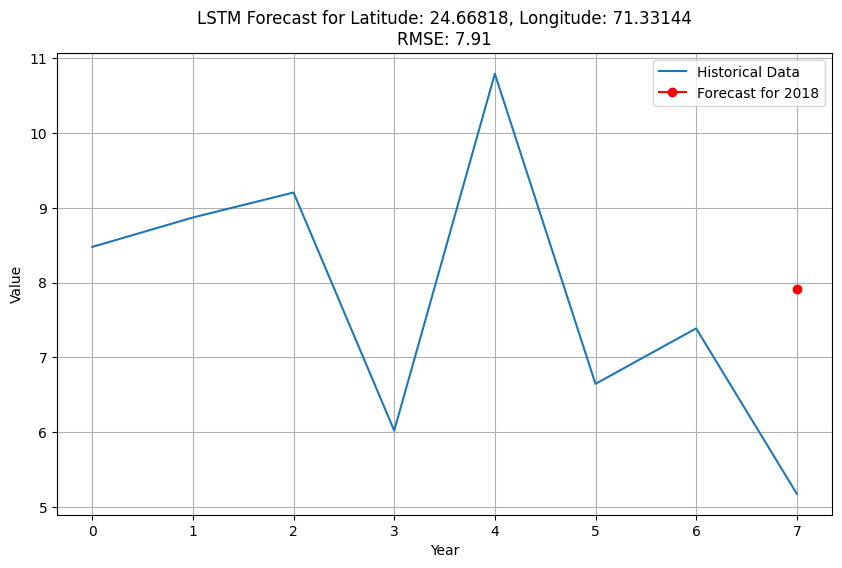

Forecasted value for 2018: 7.91
RMSE for the forecast: 7.91


In [31]:
# Make predictions for 2018e
y_pred = []
last_seq = X_train[-1]
for i in range(len(X_test)):
    next_pred = model.predict(last_seq.reshape(1, seq_length, 1))
    y_pred.append(next_pred[0][0])
    last_seq = np.concatenate((last_seq[1:], next_pred))

# Inverse transform the normalized predictions
y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))

# Calculate RMSE on test data (2018 actual values)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(time_series)), time_series, label='Historical Data')
plt.plot(len(time_series) - 1, y_pred[0], marker='o', color='red', label='Forecast for 2018')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'LSTM Forecast for Latitude: {latitude}, Longitude: {longitude}\nRMSE: {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(f'Forecasted value for 2018: {y_pred[0][0]:.2f}')
print(f'RMSE for the forecast: {rmse:.2f}')


